<a href="https://colab.research.google.com/github/am28012/Hands_on_project/blob/main/Predictive_Model_USA_Crime_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv('/content/crime_safety_dataset.cleaned.csv')

In [23]:
print("DataFrame Info:")
df.info()
print(f"\nStatistical Summary : {df.describe(include = 'all')}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
 10  date_dt               1000 non-null   object
 11  day_of_week           1000 non-null   object
 12  month                 1000 non-null   object
 13  year                  1000 non-null   int32 
 14  time_ts               1000 non-null   object
 15  monthyear             1

In [10]:
df.isna().sum()

,0
id,0
date,0
time,0
crime_type,0
city,0
state,0
location_description,0
victim_age,0
victim_gender,0
victim_race,0


In [14]:
df['date_dt'] = pd.to_datetime(df['date'] , format = '%d-%m-%Y' ).dt.date

In [17]:
df['day_of_week'] = pd.to_datetime(df['date_dt']).dt.day_name()
df['month'] = pd.to_datetime(df['date_dt']).dt.month_name()
df['year'] = pd.to_datetime(df['date_dt']).dt.year
display(df.head())

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,date_dt,day_of_week,month,year
0,1,09-09-2022,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,2022-09-09,Friday,September,2022
1,2,10-07-2022,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,2022-07-10,Sunday,July,2022
2,3,31-12-2024,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,2024-12-31,Tuesday,December,2024
3,4,12-04-2024,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,2024-04-12,Friday,April,2024
4,5,19-07-2023,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,2023-07-19,Wednesday,July,2023


In [46]:

print(f"CREATE PREDICTIVE MODEL TO IDENTIFY CRIME TYPE BASED ON VICTIM AGE AND CITY")

from sklearn.model_selection import train_test_split

df_model = df[['crime_type', 'city', 'victim_age']]
df_model = pd.get_dummies(df_model, columns=['city'], drop_first=True)

X = df_model.drop('crime_type', axis=1)
y = df_model['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

CREATE PREDICTIVE MODEL TO IDENTIFY CRIME TYPE BASED ON VICTIM AGE AND CITY
X_train shape: (800, 10)
X_test shape: (200, 10)
y_train shape: (800,)
y_test shape: (200,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Classification Report:
                   precision    recall  f1-score   support

            Arson       0.00      0.00      0.00        22
          Assault       0.00      0.00      0.00        21
         Burglary       0.12      0.26      0.16        23
Domestic Violence       0.13      0.32      0.19        22
     Drug Offense       0.15      0.11      0.13        18
            Fraud       0.00      0.00      0.00        16
         Homicide       0.11      0.21      0.14        19
          Robbery       0.08      0.10      0.09        21
            Theft       0.00      0.00      0.00        19
        Vandalism       0.00      0.00      0.00        19

         accuracy                           0.10       200
        macro avg       0.06      0.10      0.07       200
     weighted avg       0.06      0.10      0.07       200

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


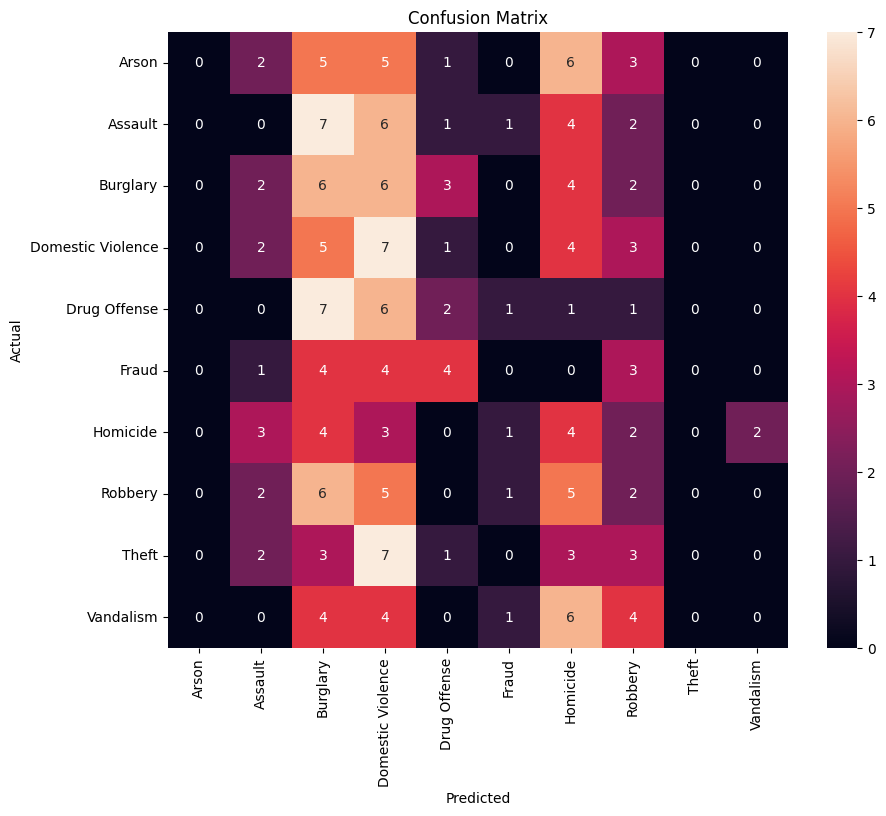

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

print("Random Forest Classifier trained successfully!")

Random Forest Classifier trained successfully!


In [44]:

from sklearn.metrics import classification_report, confusion_matrix
y_pred_rf = rf_clf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
                   precision    recall  f1-score   support

            Arson       0.12      0.14      0.13        22
          Assault       0.00      0.00      0.00        21
         Burglary       0.12      0.13      0.12        23
Domestic Violence       0.12      0.09      0.10        22
     Drug Offense       0.09      0.11      0.10        18
            Fraud       0.13      0.12      0.13        16
         Homicide       0.10      0.16      0.12        19
          Robbery       0.04      0.05      0.04        21
            Theft       0.27      0.21      0.24        19
        Vandalism       0.07      0.05      0.06        19

         accuracy                           0.10       200
        macro avg       0.11      0.11      0.10       200
     weighted avg       0.10      0.10      0.10       200


Random Forest Confusion Matrix:
[[3 2 6 0 0 1 1 5 3 1]
 [6 0 0 1 3 3 3 4 1 0]
 [1 3 3 4 3 1 5 0 2 1]
 [3 0 5 2 1 3 4 2 0 2]
 [0 0 2 2

In [47]:
print(f"CREATE PREDICITIVE MODEL TO IDENTIFY CITY BASED ON CRIME TYPE , AGE , GENDER , RACE")

CREATE PREDICITIVE MODEL TO IDENTIFY CITY BASED ON CRIME TYPE , AGE , GENDER , RACE


In [58]:
contingency_table = pd.crosstab(df['crime_type'], df['city'])
print(contingency_table)

from sklearn.model_selection import train_test_split
df_model = df[['crime_type', 'city', 'victim_age', 'victim_gender' , 'victim_race']]
df_model = pd.get_dummies(df_model, columns=['crime_type', 'victim_gender', 'victim_race'], drop_first=True)

X = df_model.drop('city', axis=1)
y = df_model['city']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

city               Chicago  Dallas  Houston  Los Angeles  New York  \
crime_type                                                           
Arson                    4      11       11           11        13   
Assault                  9       6       12           16         9   
Burglary                14      19       13            9        13   
Domestic Violence       13       7       11           17        10   
Drug Offense             9      14        7            5         5   
Fraud                   13       8        9            6         8   
Homicide                 9      11       13           11        13   
Robbery                 10       8       14            9        11   
Theft                    9      12       10            7        10   
Vandalism               11      10        6           11        13   

city               Philadelphia  Phoenix  San Antonio  San Diego  San Jose  
crime_type                                                                  
Arson

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Classification Report:
              precision    recall  f1-score   support

     Chicago       0.05      0.05      0.05        19
      Dallas       0.15      0.19      0.17        27
     Houston       0.06      0.05      0.06        19
 Los Angeles       0.11      0.20      0.14        20
    New York       0.00      0.00      0.00        21
Philadelphia       0.12      0.13      0.13        15
     Phoenix       0.04      0.06      0.05        18
 San Antonio       0.04      0.05      0.04        21
   San Diego       0.20      0.15      0.17        20
    San Jose       0.00      0.00      0.00        20

    accuracy                           0.09       200
   macro avg       0.08      0.09      0.08       200
weighted avg       0.08      0.09      0.08       200

Confusion Matrix:


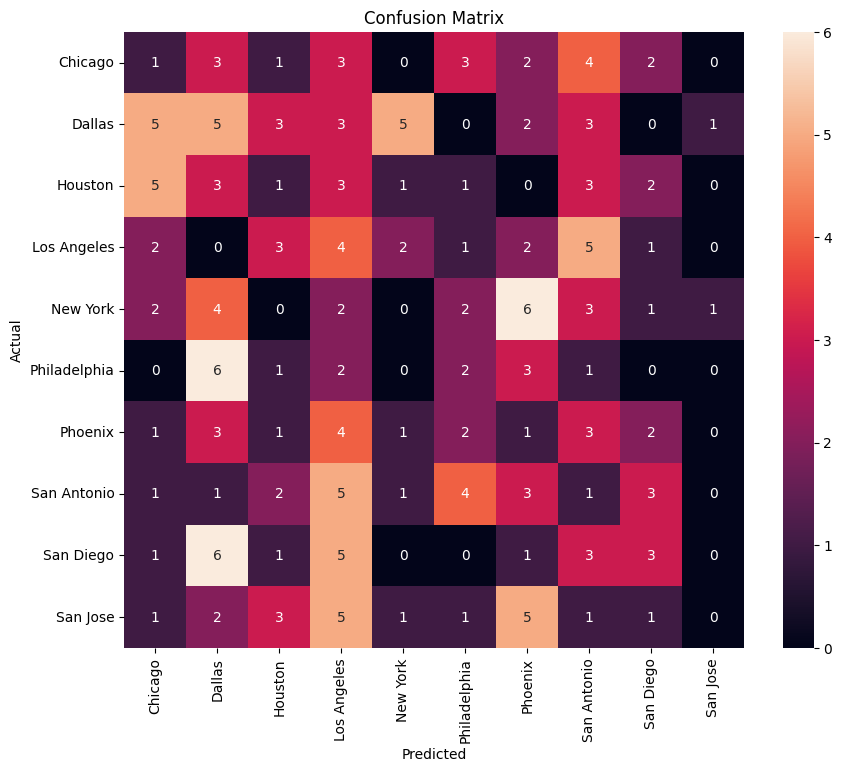

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

print("Random Forest Classifier trained successfully!")

Random Forest Classifier trained successfully!


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_rf = rf_clf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

     Chicago       0.11      0.11      0.11        19
      Dallas       0.06      0.04      0.04        27
     Houston       0.14      0.16      0.15        19
 Los Angeles       0.15      0.15      0.15        20
    New York       0.11      0.14      0.12        21
Philadelphia       0.13      0.20      0.16        15
     Phoenix       0.00      0.00      0.00        18
 San Antonio       0.11      0.10      0.10        21
   San Diego       0.21      0.15      0.18        20
    San Jose       0.12      0.15      0.14        20

    accuracy                           0.12       200
   macro avg       0.11      0.12      0.11       200
weighted avg       0.11      0.12      0.11       200


Random Forest Confusion Matrix:
[[2 4 2 4 1 0 0 3 1 2]
 [1 1 2 0 7 5 3 2 2 4]
 [2 1 3 1 5 2 2 2 0 1]
 [1 1 5 3 3 0 2 2 1 2]
 [2 0 1 4 3 1 3 2 1 4]
 [0 3 2 1 0 3 0 0 3 3]
 [4 1 3 2 1 2 0 2 0 3]
 [2 3 2 0 

In [72]:
print(f"Predictive Model to Identify State based on gender, victim_age, month, and day_of_week")
contingency_table = pd.crosstab(df['state'], df['victim_gender'])
print(contingency_table)


Predictive Model to Identify State based on gender, victim_age, month, and day_of_week
victim_gender  Female  Male  Non-binary  Other
state                                         
AZ                 34    24          17     23
CA                 70    76          68     76
IL                 23    29          23     26
NY                 35    30          22     18
PA                 29    24          21     25
TX                 68    89          81     69


In [76]:
from sklearn.model_selection import train_test_split
df_model = df[['state', 'victim_gender', 'month', 'day_of_week']]
df_model = pd.get_dummies(df_model, columns=[ 'victim_gender'], drop_first=True)

X = df_model.drop('state', axis=1)
y = df_model['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 5)
X_test shape: (200, 5)
y_train shape: (800,)
y_test shape: (200,)


Random Forest Classification Report:
              precision    recall  f1-score   support

          AZ       0.00      0.00      0.00        18
          CA       0.29      0.33      0.31        60
          IL       0.00      0.00      0.00        19
          NY       0.09      0.10      0.09        21
          PA       0.16      0.20      0.18        15
          TX       0.34      0.31      0.33        67

    accuracy                           0.23       200
   macro avg       0.14      0.16      0.15       200
weighted avg       0.22      0.23      0.22       200


Random Forest Confusion Matrix:


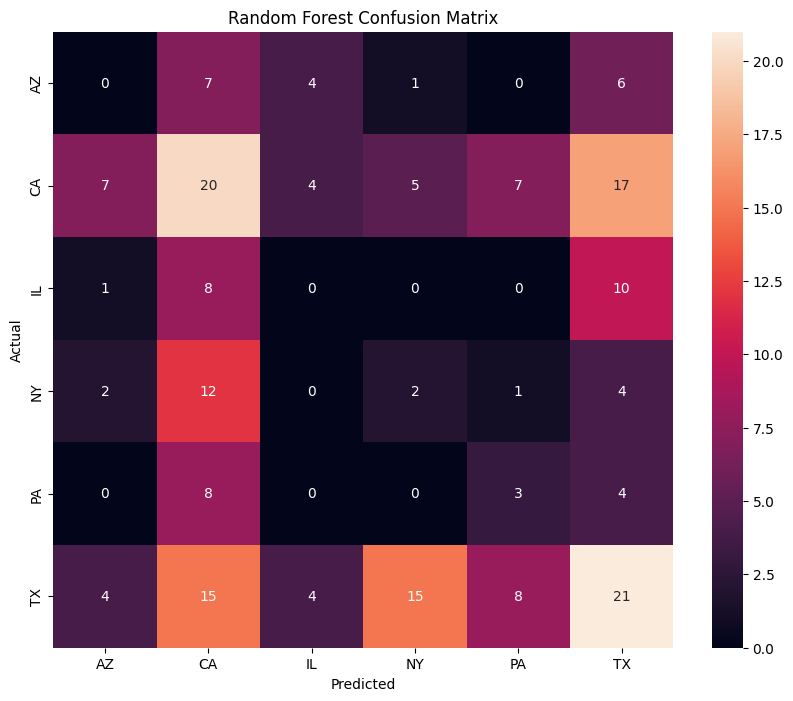

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()